In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def solve_diffusion_equation(u, D, dt, dx, dy, num_steps):
    # Dimensiones de la malla
    ny, nx = u.shape
    
    # Coeficientes para la estabilidad del método
    coeff_x = D * dt / (dx ** 2)
    coeff_y = D * dt / (dy ** 2)
    
    for _ in range(num_steps):
        # Crear una copia de u en el tiempo actual
        u_old = u.copy()
        
        # Actualizar u en el siguiente paso de tiempo
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                u[i, j] = u_old[i, j] + coeff_x * (u_old[i+1, j] - 2*u_old[i, j] + u_old[i-1, j]) + \
                          coeff_y * (u_old[i, j+1] - 2*u_old[i, j] + u_old[i, j-1])
    
    return u

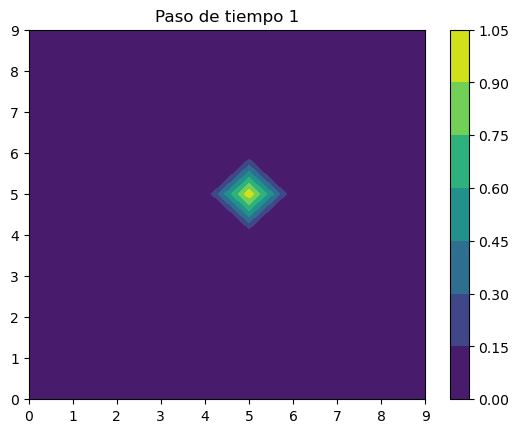

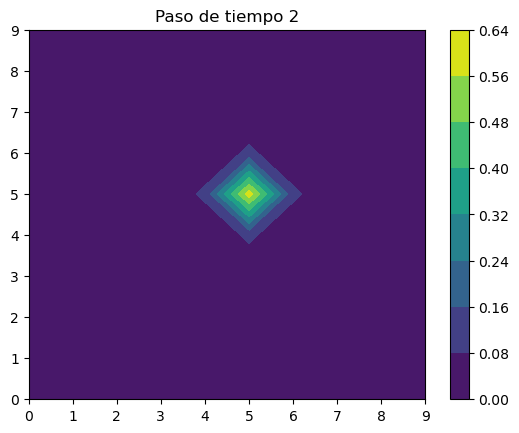

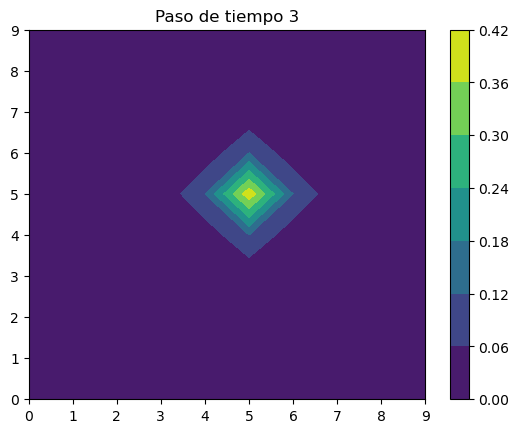

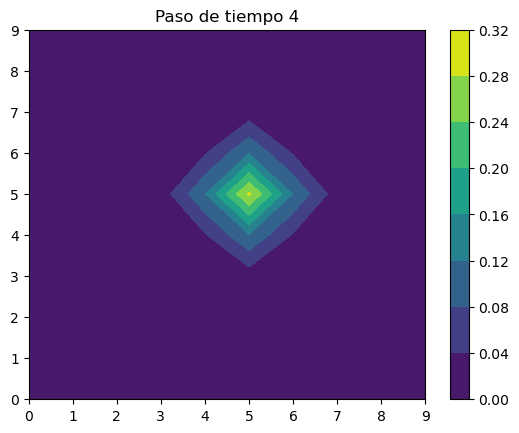

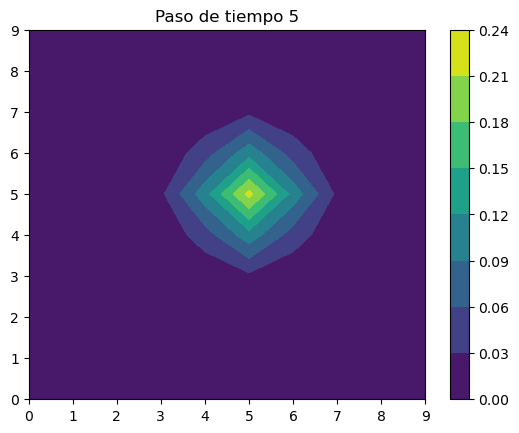

In [7]:
# Parámetros de la simulación
D = 0.1  # Coeficiente de difusión
dt = 0.01  # Paso de tiempo
dx = 0.1  # Paso espacial en la dirección x
dy = 0.1  # Paso espacial en la dirección y
num_steps = 5  # Número de pasos de tiempo

# Crear una malla (matriz) para almacenar los valores de u
nx = 10  # Número de puntos en la dirección x
ny = 10  # Número de puntos en la dirección y
u = np.zeros((nx, ny))

# Condiciones iniciales
u[nx//2, ny//2] = 1.0  # Valor inicial en el punto central

# Resolver la ecuación de difusión en el tiempo
for step in range(num_steps):
    # Graficar la solución actual
    plt.figure()
    plt.contourf(u)
    plt.colorbar()
    plt.title(f"Paso de tiempo {step+1}")
    plt.show()
    
    # Resolver un paso de tiempo
    u = solve_diffusion_equation(u, D, dt, dx, dy, 1)